In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
(train_img, train_labels), (test_img,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000,)

In [ ]:
test_img.shape

(10000, 28, 28)

In [ ]:
test_labels.shape

(10000,)

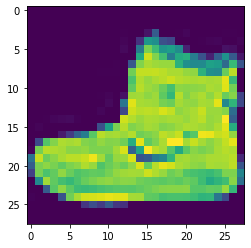

In [ ]:
plt.imshow(train_img[0])

In [ ]:
train_labels[0]

9

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names[train_labels[0]]

'Ankle boot'

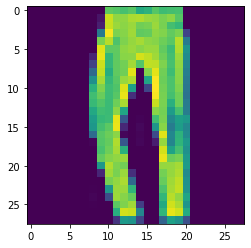

In [ ]:
plt.imshow(test_img[5])

In [ ]:
print(test_labels[5])
class_names[test_labels[5]]

1


'Trouser'

In [ ]:
train_image_scaled = train_img/255
test_img_scaled = test_img/255

In [ ]:
train_image_scaled[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [ ]:
len(class_names)

10

In [ ]:
train_labels_categorical = keras.utils.to_categorical(
    train_labels, num_classes=11, dtype='float32'
)
train_labels_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
test_label_categorical = keras.utils.to_categorical(
    test_labels, num_classes=11, dtype='float32'
)
test_label_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]], dtype=float32)

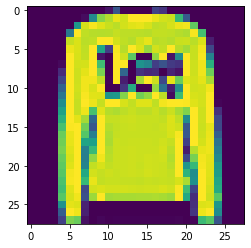

In [ ]:
plt.imshow(test_img[1])

In [ ]:
class_names[test_labels[1]]

'Pullover'

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(500,activation='relu'),
    keras.layers.Dense(200,activation='relu'),
    keras.layers.Dense(11,activation='sigmoid')
])
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [ ]:
model.fit(train_image_scaled , train_labels_categorical, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6832 - accuracy: 0.7754
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4720 - accuracy: 0.8360
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4286 - accuracy: 0.8508
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4015 - accuracy: 0.8596
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3814 - accuracy: 0.8669
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3656 - accuracy: 0.8712
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3530 - accuracy: 0.8745
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3406 - accuracy: 0.8790
Epoch 9/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3296 - accuracy: 0.8827
Epoch 10/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.320

In [ ]:
model.predict(test_img_scaled)[2]

array([9.7723085e-01, 1.0000000e+00, 2.9527226e-01, 8.4709239e-01,
       9.7262847e-01, 1.9125810e-06, 8.6809903e-02, 1.8831912e-01,
       6.8062067e-02, 2.0134449e-04, 9.1621280e-04], dtype=float32)

In [ ]:
class_names[test_labels[2]]

'Trouser'

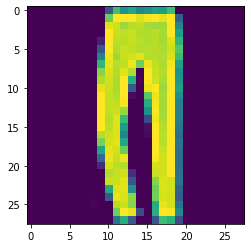

In [ ]:
plt.imshow(test_img_scaled[2])

In [ ]:
class_names[np.argmax(model.predict(test_img_scaled)[2])]

'Trouser'

In [ ]:
model.evaluate(test_img_scaled, test_label_categorical)

313/313 [==============================] - 1s 2ms/step - loss: 0.3188 - accuracy: 0.8912


[0.3188101053237915, 0.8912000060081482]